# Introduction

X Education, an Education company is into selling of online courses to industry professionals.

Company markets its courses on several websites and search engines like Google and visitors land on the website, browse the courses or fill up a form for the course or watch some videos.

Visitors fill up a form providing their email address or phone number, they are classified to be a lead.

The company also gets leads through past referrals and these leads are acquired, employees from the sales team start approaching the potential leads by making calls, writing emails, etc.

As per company information lead conversion rate is around 30%.

# Business Goal

To find factors which would suffice the company’s objective of identifying potential leads and their sources to increase their lead conversion, thereby adding to their overall revenue.

# Requirement guideline

A logistic regression model with more than 80% conversion rate to assign was required to be built that would assign a lead score between 0 and 100 to each of the leads which would be used by the company to target potential leads.

# Step 1: Importing Libraries and Data

#### Importing all the libraries

In [1]:
import warnings # importing warnings to ignore warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np #importing pandas and numpy liraries
pd.set_option('display.max_rows', 1000) # to display max number of rows
pd.set_option('display.max_columns', 100) # to display max number of columns

In [3]:
import seaborn as sns, matplotlib.pyplot as plt #importing seaborn and matplotlib libraries

In [4]:
from sklearn.model_selection import train_test_split         # importing train_test_split library from sklearn module
from sklearn.preprocessing import StandardScaler             # importing StandardScaler library from sklearn module
from sklearn.feature_selection import RFE                    # importing RFE library from sklearn module
from sklearn.linear_model import LogisticRegression          # importing LogisticRegression library from sklearn module
from sklearn import metrics                                  # importing metrics library from sklearn module
from sklearn.metrics import precision_score, recall_score    # importing precision_score, recall_score library from sklearn module
from sklearn.metrics import precision_recall_curve           # importing precision_recall_curve library from sklearn module

In [5]:
import statsmodels.api as sm                                               # importing statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor # importing VIF

#### Importing the dataset

In [6]:
score = pd.read_csv('Leads.csv') #importing the dataset

# Step 2: Inspecting and Cleaning the Dataset

In [7]:
score.head(20) #looking at the top 20 rows

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [8]:
score.shape #Rows and columns count of the dataset

(9240, 37)

**Observation**:There are 9240 rows and 37 columns in the dataset

In [9]:
score.describe() # for details like count, mean, std, percentile etc. of score dataset

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
score.info() # for null counts and datatype of score dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
score['Converted'].value_counts #looking at the target column "Converted"

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64>

In [12]:
score.columns #Viewing the list of columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
for i in score.columns: #This step is helping to find the unique entries of each columns using for loop
    print(i,"\n")
    print(score[i].unique())
    print('\n')

Prospect ID 

['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']


Lead Number 

[660737 660728 660727 ... 579545 579538 579533]


Lead Origin 

['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']


Lead Source 

['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']


Do Not Email 

['No' 'Yes']


Do Not Call 

['No' 'Yes']


Converted 

[0 1]


TotalVisits 

[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  

**Observation**: As we can see there are some columns having **'Select'** as entries. These entries indicates that the correct value was not selected while data collection, hence can be treated as null

In [14]:
for i in score.columns: #This step is helping to number of unique entries of each columns using for loop
    print(i,"\n")
    print(len(score[i].unique()))
    print('\n')

Prospect ID 

9240


Lead Number 

9240


Lead Origin 

5


Lead Source 

22


Do Not Email 

2


Do Not Call 

2


Converted 

2


TotalVisits 

42


Total Time Spent on Website 

1731


Page Views Per Visit 

115


Last Activity 

18


Country 

39


Specialization 

20


How did you hear about X Education 

11


What is your current occupation 

7


What matters most to you in choosing a course 

4


Search 

2


Magazine 

1


Newspaper Article 

2


X Education Forums 

2


Newspaper 

2


Digital Advertisement 

2


Through Recommendations 

2


Receive More Updates About Our Courses 

1


Tags 

27


Lead Quality 

6


Update me on Supply Chain Content 

1


Get updates on DM Content 

1


Lead Profile 

7


City 

8


Asymmetrique Activity Index 

4


Asymmetrique Profile Index 

4


Asymmetrique Activity Score 

13


Asymmetrique Profile Score 

11


I agree to pay the amount through cheque 

1


A free copy of Mastering The Interview 

2


Last Notable Activity 

16




**Observation**: As there are many columns with just signle entry, these columns can be dropped

In [15]:
score = score.replace('Select', np.nan) #replacing "Select" with Nan

In [16]:
for i in score.columns: #This step is done to drop the columns having only 1 unique entries
    if (len(score[i].unique())) == 1:
        score.drop(i, axis = 1, inplace =True)

In [17]:
score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [18]:
score.shape

(9240, 32)

**Observation**: After dropping columns with 1 unique entries, currently there are 32 columns

In [19]:
round(score.isnull().sum()/len(score)*100,2) #Calculating null percentage

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

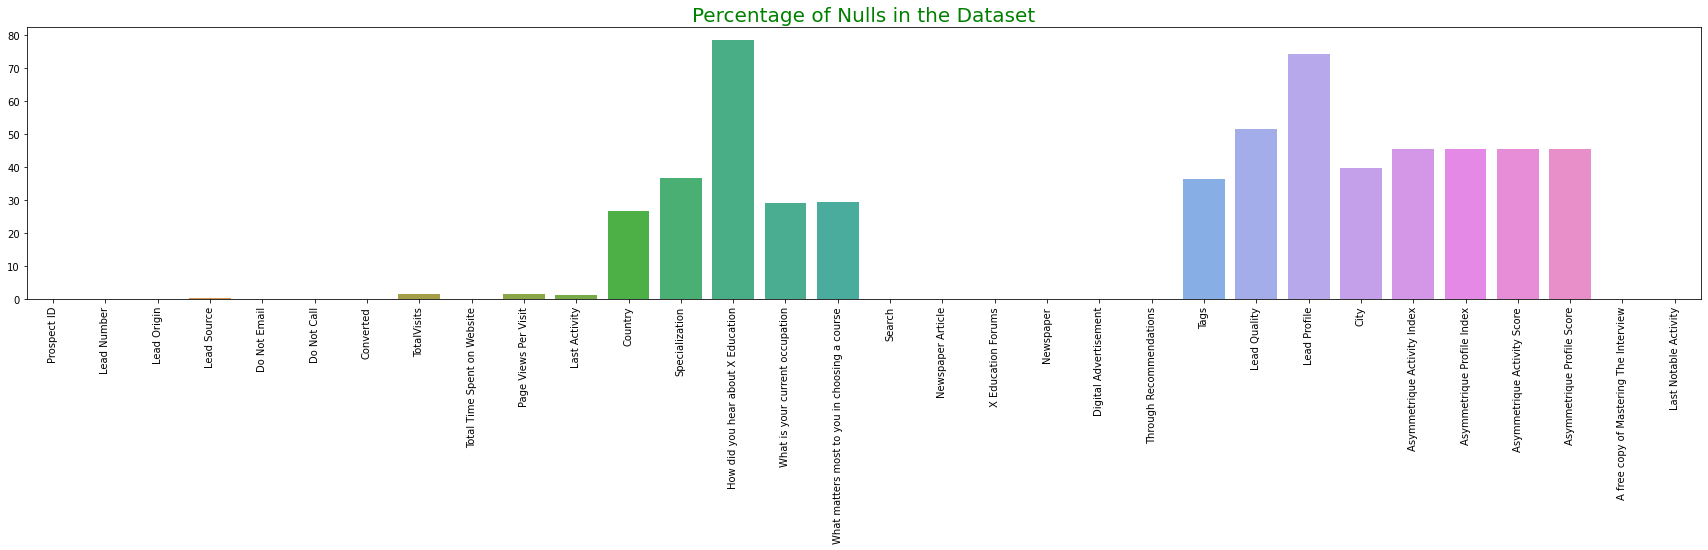

In [20]:
# Plotting nulls
plt.figure(figsize = [30,5])
sns.barplot(y = score.isnull().sum()/score.shape[0]*100, x = score.columns)
plt.xticks(rotation = 90)
plt.title('Percentage of Nulls in the Dataset', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [21]:
# Checking for duplicate entries in columns "Prospect ID" and "Lead Number"
print(sum(score.duplicated(subset = 'Prospect ID')))
print(sum(score.duplicated(subset = 'Lead Number')))

0
0


**Observation**: In the columns "Prospect ID" and "Lead Number" no duplicated entries were found. Hence no need to drop any duplicate entries

In [22]:
# Dropping columns "Prospect ID" and "Lead Number"
score = score.drop(["Prospect ID","Lead Number"], axis = 1)

**Comment**: All the columns with nulls more than 40% can be dropped. However column "Lead Quality" might be useful, so will not drop the column right now. In case if the column won't prove to be relevant, it will be dropped later

#### Dropping columns with more than 40% Nulls

In [23]:
drop_col = [i for i in score.columns if score[i].isnull().sum()/len(score)*100 >= 40] # making list of columns with more than 40% nulls to use to drop the columns
drop_col

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [24]:
drop_col.remove('Lead Quality') # Since column 'Lead Quality' is not supposed to be dropped, removing this from drop_col list

In [25]:
print(drop_col) # list of columns to drop

['How did you hear about X Education', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [26]:
score.drop(drop_col, axis = 1, inplace= True) # dropping columns with more than 40% nulls excpet column 'Lead Quality'

In [27]:
score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,No,Modified


In [28]:
score.shape

(9240, 24)

**Observation**: After dropping columns with more than 40% nulls, currently there are 24 columns

In [29]:
score.columns #Final list of columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

# Step 3: Exploratory Data Analysis

#### Univariate Analysis: Boxplot

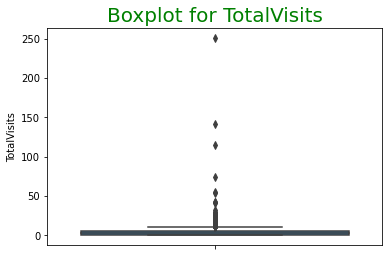

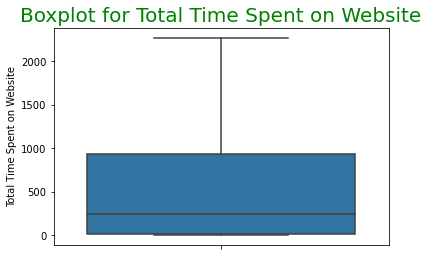

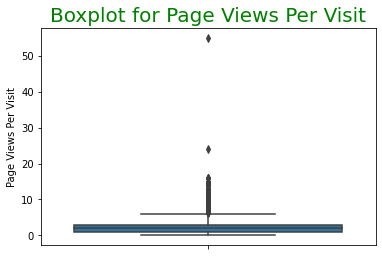

In [30]:
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] #gathering numerical columns, except target columns
for i in num_cols:
    plt.title(f"Boxplot for {i}", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    sns.boxplot(y = i, data = score)
    plt.show()
    print("\n")

##### Reviewing the outliers for columns 'TotalVisits' and 'Page Views Per Visit'

In [31]:
score['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .98, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
97%        11.000000
98%        13.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

Columns TotalVisits needs to be capped as below
- TotalVisits: Cap at 20

In [32]:
score.loc[score['TotalVisits']>20,['TotalVisits']] = 20 # capping values >20 to 20 for column 'TotalVisits'

In [33]:
score['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .98, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
97%         7.000000
98%         8.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

Columns Page Views Per Visit needs to be capped as below
- TotalVisits: Cap at 10

In [34]:
score.loc[score['Page Views Per Visit']>10,['Page Views Per Visit']] = 10 # capping values >20 to 20 for column 'Page Views Per Visit'

In [35]:
score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,No,Modified


##### Catgegorical Columns

In [36]:
cat_cols = list(score.columns) #using for loop and earlier defined num_cols, defining cat_cols
for i in num_cols:
    cat_cols.remove(i)
    
cat_cols.remove('Converted') #as 'COnverted' is target variable

#### Bi-Variate Analysis: Countplot variation with Converted

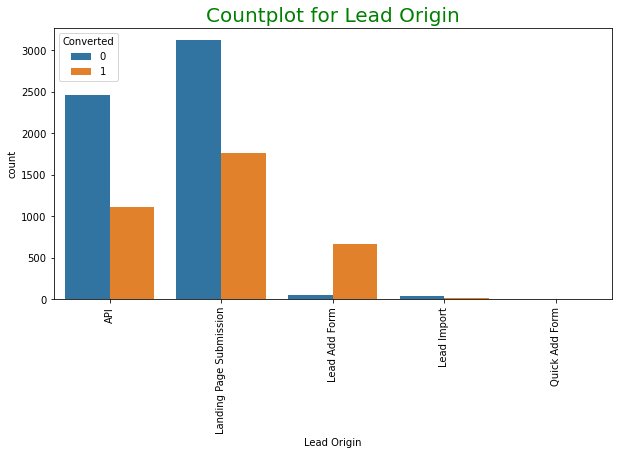

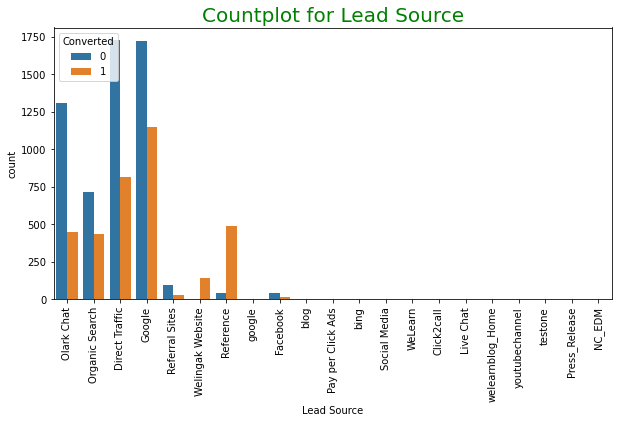

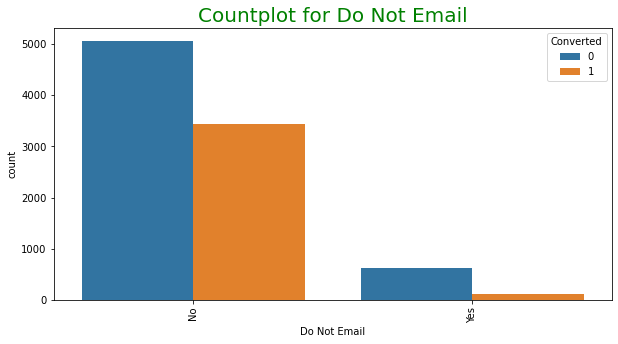

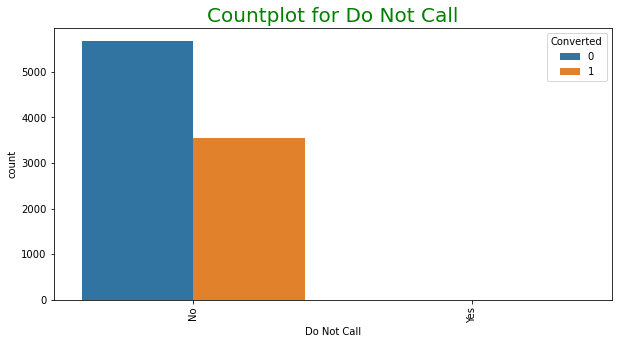

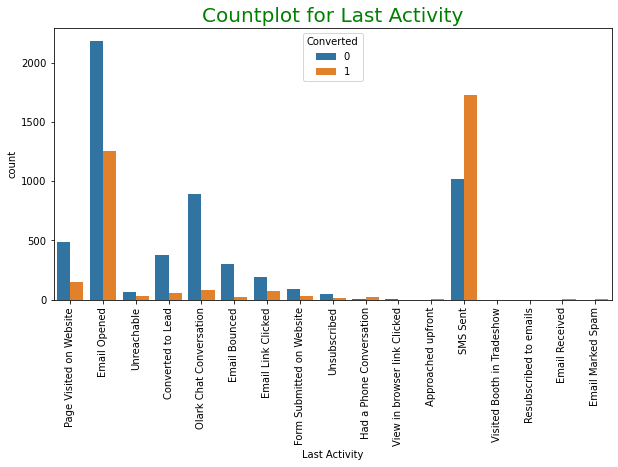

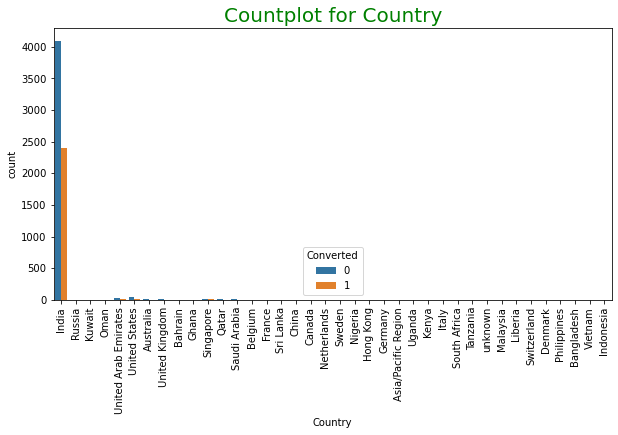

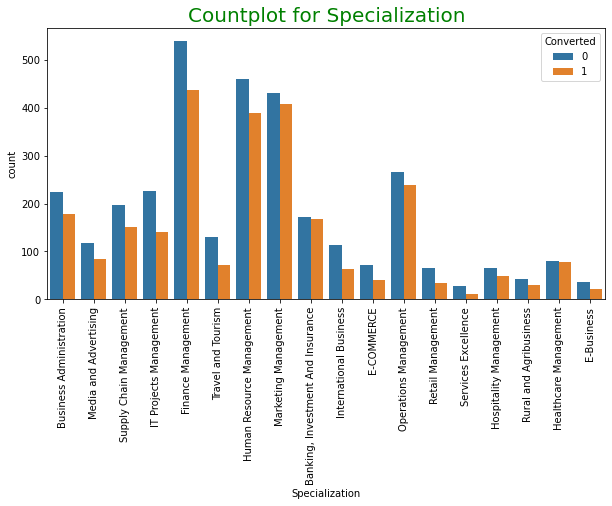

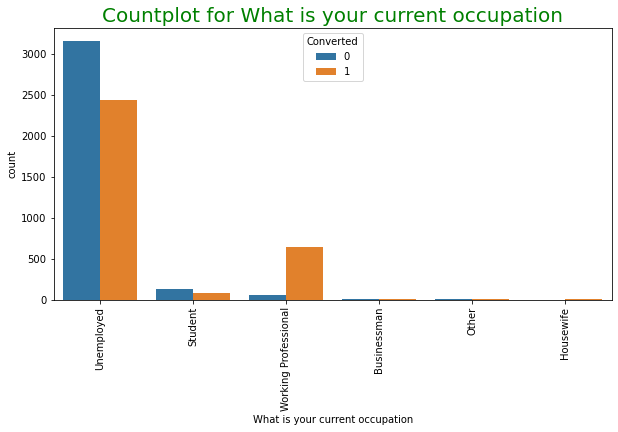

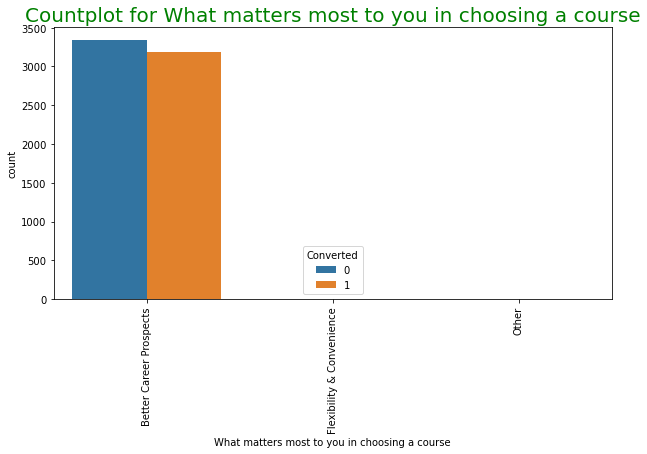

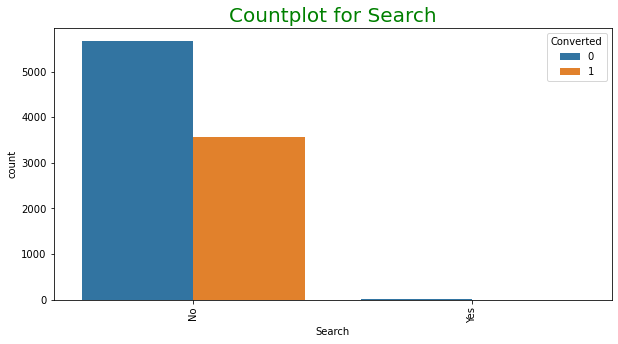

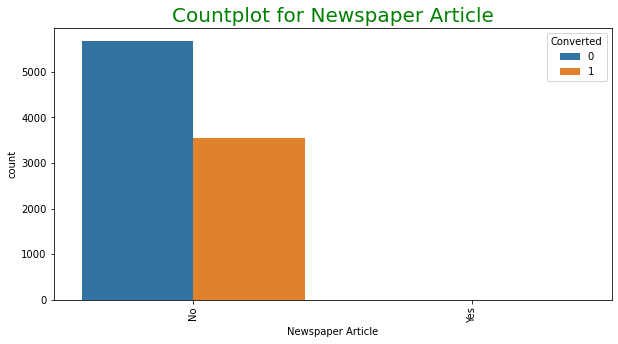

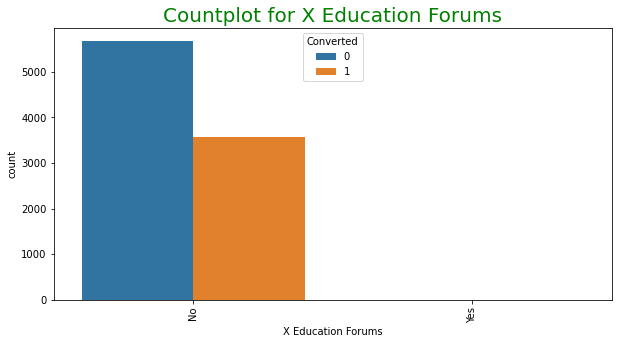

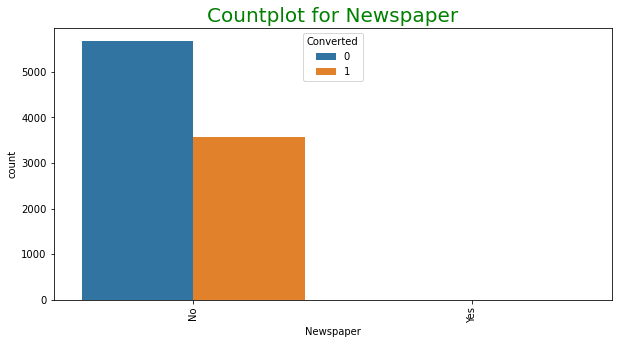

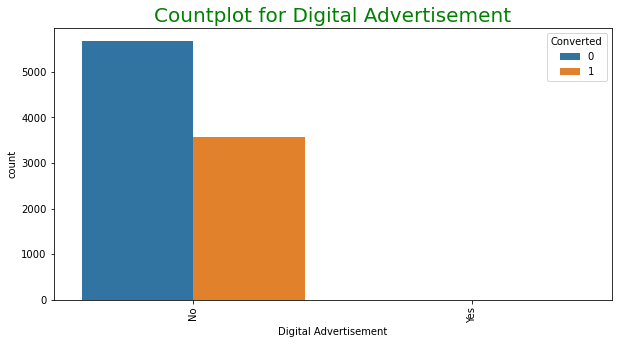

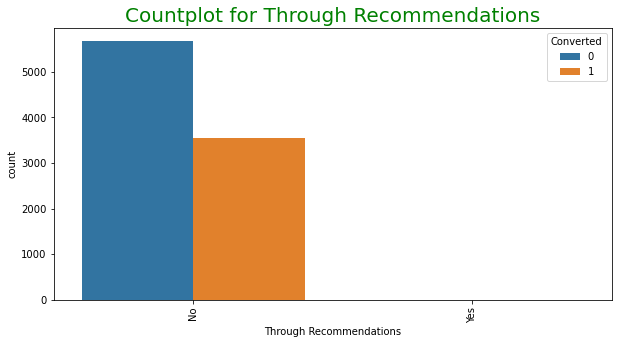

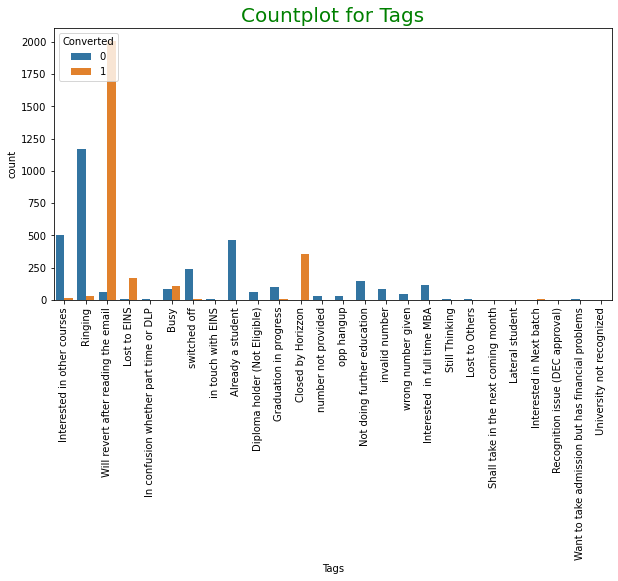

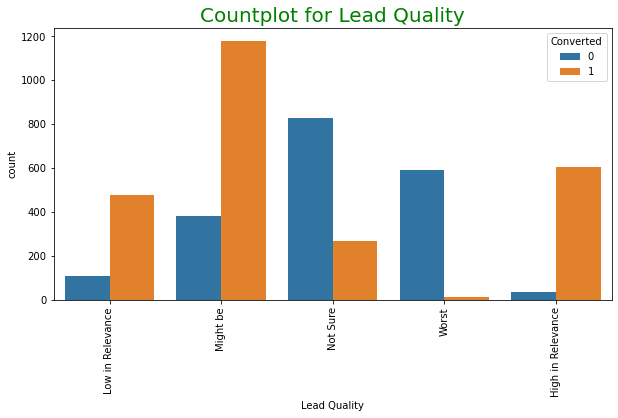

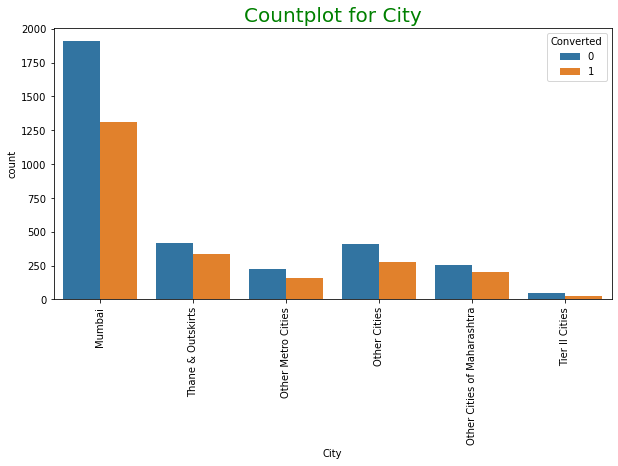

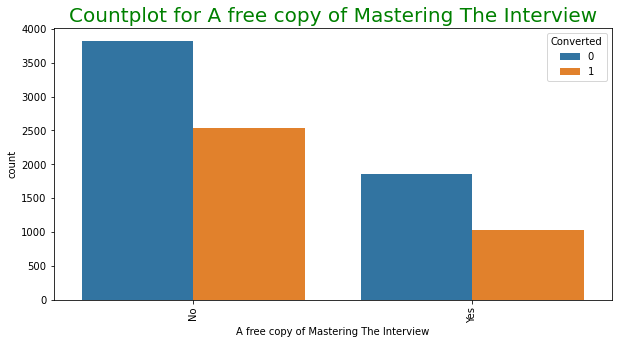

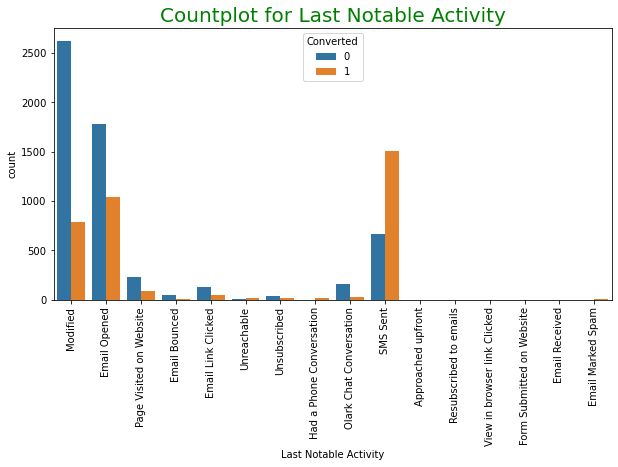

In [37]:
for i in cat_cols:
    plt.figure(figsize = (10,5))
    plt.title(f"Countplot for {i}", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    sns.countplot(score[i], hue = score.Converted)
    plt.xticks(rotation = 90)
    plt.show()
    print("\n")

**Observation**:

- As it can be observed that there are very few entries for country column which are not India, hence this column might not be useful in analysis. 
- Similarly there are many other columns like Do Not Call, What matters most to you in choosing a course, Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations having only one significant value.
- Also it can be observed that there are 2 columns "Last Activity" and "Last Notable Activity" ith similar spread and values. Hence we can drop one of these 2 columns
    - Since "Last Activity" column is having some nulls, it can be dropped

In [38]:
score.drop(['Last Activity'], axis = 1, inplace=True) # Dropping Last Activity Column

##### Reviewing the percentage of non-significant values of these columns

In [39]:
len(score[score['Do Not Call'] == 'Yes'])/len(score)*100

0.021645021645021644

In [40]:
len(score[(score['What matters most to you in choosing a course'] == 'Flexibility & Convenience') | (score['What matters most to you in choosing a course'] == 'Others')])/len(score) * 100

0.021645021645021644

In [41]:
len(score[score['Search'] == 'Yes'])/len(score)*100

0.15151515151515152

In [42]:
len(score[score['Newspaper'] == 'Yes'])/len(score)*100

0.010822510822510822

In [43]:
len(score[score['Newspaper Article'] == 'Yes'])/len(score)*100

0.021645021645021644

In [44]:
len(score[score['X Education Forums'] == 'Yes'])/len(score)*100

0.010822510822510822

In [45]:
len(score[score['Newspaper'] == 'Yes'])/len(score)*100

0.010822510822510822

In [46]:
len(score[score['Digital Advertisement'] == 'Yes'])/len(score)*100

0.04329004329004329

In [47]:
len(score[score['Through Recommendations'] == 'Yes'])/len(score)*100

0.07575757575757576

In [48]:
# Dropping columns having insignificant values: Assigning the columns to list
insig_cols = ['Country','Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

In [49]:
score.drop(insig_cols, axis = 1, inplace = True) # Dropping columns having insignificant values

In [50]:
score.shape

(9240, 14)

**Observtion**: After removal of all columns with mostly unique values, there are 14 columns remaining

In [51]:
score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,NaN,Unemployed,Interested in other courses,Low in Relevance,NaN,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,NaN,Unemployed,Ringing,NaN,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,NaN,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified


##### Reviewing 'What is your current occupation' column

In [52]:
score['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [53]:
score['What is your current occupation'].isnull().sum()/len(score)*100

29.11255411255411

**Observation**: There are significant number of nulls in the column. Not removing this column from analysis for now.

In [54]:
cat_cols #list of remaining columns in cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'Lead Quality',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

##### Need to clean the remianing categorical columns

Cleaning Lead Source Column

In [55]:
score['Lead Source'].replace(np.nan, 'Others', inplace=True) #replace nan with Others

In [56]:
score['Lead Source'].replace('google', 'Google', inplace=True) #replace google with Google

In [57]:
score['Lead Source'].replace('Facebook', 'Social Media', inplace=True) #replace Facebook with Social Media

In [58]:
insig_vals = list(score['Lead Source'].value_counts().loc[lambda x: x<36].index)

In [59]:
score['Lead Source'].replace(insig_vals, 'Others', inplace=True) #replace Facebook with Social Media

In [60]:
score['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                57
Name: Lead Source, dtype: int64

Cleaning Tags

In [61]:
score['Tags'].replace(np.nan, 'Unknown', inplace=True) #replace nan with Others

In [62]:
score['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Unknown', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [63]:
score['Tags'].value_counts()

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [64]:
insig_vals = list(score['Tags'].value_counts().loc[lambda x: x<=186].index)

In [65]:
score['Tags'].replace(insig_vals, 'Others', inplace=True) # Combining insignificant values to others

In [66]:
score['Tags'].value_counts()

Unknown                                3353
Will revert after reading the email    2072
Ringing                                1203
Others                                 1036
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Name: Tags, dtype: int64

Cleaning Last Notable Activity

In [67]:
score['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [68]:
score['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [69]:
insig_vals = list(score['Last Notable Activity'].value_counts().loc[lambda x: x<=60].index)

In [70]:
score['Last Notable Activity'].replace(insig_vals, 'Others', inplace=True) # Combining insignificant values to others

In [71]:
score['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

In [72]:
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'Lead Quality',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [73]:
round(score.isnull().sum()/len(score)*100,2) #Calculating null percentage

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Specialization                            36.58
What is your current occupation           29.11
Tags                                       0.00
Lead Quality                              51.59
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

**Observation**: There are few categroical columns remaining having nulls. These nulls can be replaced by other category like **Unknown**.

In [74]:
#replace nan with Unknown for all other categorical columns

score['Specialization'].replace(np.nan, 'Unknown', inplace=True) 
score['What is your current occupation'].replace(np.nan, 'Unknown', inplace=True) 
score['Lead Quality'].replace(np.nan, 'Unknown', inplace=True) 
score['City'].replace(np.nan, 'Unknown', inplace=True) 

In [75]:
round(score.isnull().sum()/len(score)*100,2) #Calculating null percentage

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
Lead Quality                              0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### Bi-Variate Analysis: Boxplot variation with Converted

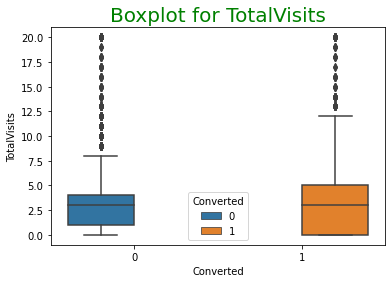

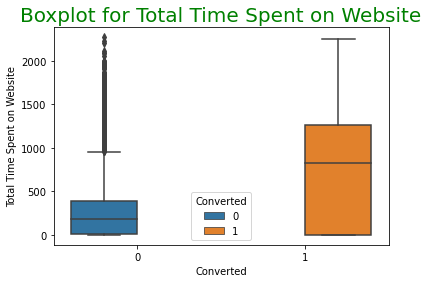

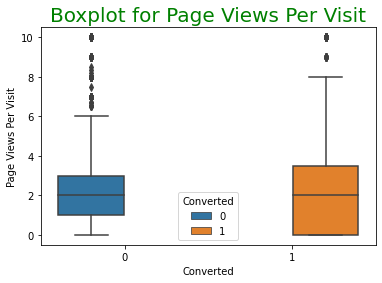

In [76]:
for i in num_cols: #ploting boxplot for numerical columns for Converted = 0 and 1
    plt.title(f"Boxplot for {i}", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    sns.boxplot(x = 'Converted', y = i, data = score, hue= 'Converted')
    plt.show()
    print("\n")

**Observation**:
1. Although there are more number of TotalVisits for converted column, the median values for both the columns are similar
2. For Total Time Spent on Website, the converted median value is closer not non-converted high range value
3. Also for Page Views Per Visit the median values for both the columns are similar

#### Bivariate Analysis: Heatmap for numerical columns

In [77]:
score.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.044523,0.362483,-0.002308
TotalVisits,0.044523,1.000000,0.322050,0.692047
Total Time Spent on Website,0.362483,0.322050,1.000000,0.339971
Page Views Per Visit,-0.002308,0.692047,0.339971,1.000000


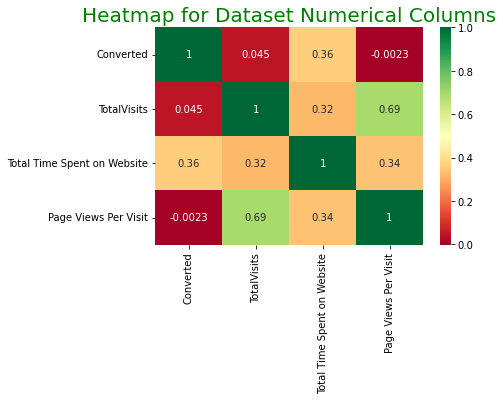

In [78]:
plt.title("Heatmap for Dataset Numerical Columns", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
sns.heatmap(score.corr(), cmap = 'RdYlGn', annot = True)
plt.show()

**Observation**: For TotalVisits and Page Views Per Visit, the correlation is highest followed by correlation between Converted and TotalVisits

#### Unvariate Analysis: Histogram for Numerical Columns

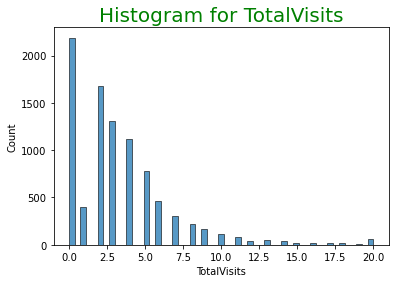

Total null count is 137 out of 9240 entries




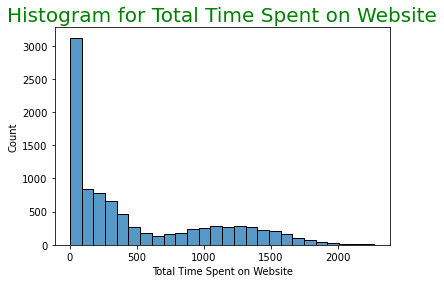

Total null count is 0 out of 9240 entries




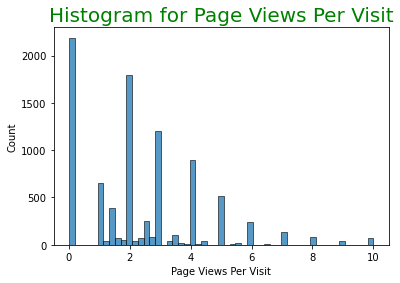

Total null count is 137 out of 9240 entries




In [79]:
for i in num_cols: #plotting histogram for numerical columns
    plt.title(f"Histogram for {i}", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    sns.histplot(score[i])
    plt.show()
    print(f'Total null count is {score[i].isnull().sum()} out of {len(score)} entries')
    print('\n')

**Observation**:
There are around 1% null values in the 2 out of 3 numerical columns. These values can be substituted ith 0 as 0 is the most frequent value

In [80]:
score.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.355817,487.698268,2.342241
std,0.486714,3.357425,548.021466,2.015212
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,20.000000,2272.000000,10.000000


In [81]:
score['TotalVisits'].value_counts()

0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
20.0      59
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
17.0      16
18.0      15
19.0       9
Name: TotalVisits, dtype: int64

In [82]:
score['TotalVisits'].fillna(0, inplace=True) # replacing the nulls with 0 which is most repeated value
score['Page Views Per Visit'].fillna(0, inplace=True) # replacing the nulls with 0 which is most repeated value

In [83]:
score.shape

(9240, 14)

**Observation**: 
- Once the null entries from the column 'TotalVisits' are removed, the 'Page Views Per Visit' column have no null entry remianing
- Number of rows remains is 9103

# Step 4: Data Preparation

Creating Dummies for Categorical Columns

In [84]:
dummies_leadsource = pd.get_dummies(score['Lead Source']) # Creating dummies for 'Lead Source' column
dummies_leadsource.drop('Others', axis = 1, inplace = True) # Dropping 'Others' dummy column create

dummies_tags = pd.get_dummies(score['Tags']) # Creating dummies for 'Tags' column
dummies_tags.drop('Others', axis = 1, inplace = True) # Dropping 'Others' dummy column create

dummies_lastnotable = pd.get_dummies(score['Last Notable Activity']) # Creating dummies for 'Last Notable Activity' column
dummies_lastnotable.drop('Others', axis = 1, inplace = True) # Dropping 'Others' dummy column create

dummies_Specialization = pd.get_dummies(score['Specialization']) # Creating dummies for 'Specialization' column
dummies_Specialization.drop('Unknown', axis = 1, inplace = True) # Dropping 'Unknown' dummy column create

dummies_currentoccupation = pd.get_dummies(score['What is your current occupation']) # Creating dummies for 'What is your current occupation' column
dummies_currentoccupation.drop('Unknown', axis = 1, inplace = True) # Dropping 'Unknown' dummy column create

dummies_leadquality = pd.get_dummies(score['Lead Quality']) # Creating dummies for 'Lead Quality' column
dummies_leadquality.drop('Unknown', axis = 1, inplace = True) # Dropping 'Unknown' dummy column create

dummies_city = pd.get_dummies(score['City']) # Creating dummies for 'City' column
dummies_city.drop('Unknown', axis = 1, inplace = True) # Dropping 'Unknown' dummy column create

In [85]:
# Creating more dummies with drop_first = True
dummies_others = pd.get_dummies(score[['Lead Origin', 'Do Not Email', 'City', 'A free copy of Mastering The Interview']], drop_first= True)

In [86]:
# Creating new dataframe as score_1 to combine the original dataset and dummies created
score_1 = pd.concat([score, dummies_leadsource, dummies_tags, dummies_lastnotable, dummies_Specialization, dummies_currentoccupation, dummies_leadquality, dummies_city, dummies_others], axis = 1)

In [87]:
score_1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Unknown,Will revert after reading the email,switched off,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Working Professional,High in Relevance,Low in Relevance,Might be,Not Sure,Worst,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Do Not Email_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,No,0,0.0,0,0.0,Unknown,Unemployed,Interested in other courses,Low in Relevance,Unknown,No,Modified,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,No,0,5.0,674,2.5,Unknown,Unemployed,Ringing,Unknown,Unknown,No,Email Opened,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No,Modified,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unknown,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [88]:
score_1.shape

(9240, 82)

**Observation**: There are 82 columns after adding dummies to original datasource

In [89]:
list(score.columns)

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [90]:
list2 = [col for col in score.columns if score[col].dtype.name=="object"] #listing columns of Object datatype, which at this point are categorical column whoes dummies are already created

In [91]:
list2

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [92]:
score_1.drop(list2, axis= 1, inplace = True) #dropping all original columns whose dumies are created

In [93]:
score_1.corr() #reviewing the correlation matrix for new dataset

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Unknown,Will revert after reading the email,switched off,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Working Professional,High in Relevance,Low in Relevance,Might be,Not Sure,Worst,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Do Not Email_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
Converted,1.000000,0.033262,0.362483,-0.014433,-0.080682,0.019109,-0.129459,-0.005879,0.270830,-0.033058,-0.022627,0.154153,-0.179234,0.251229,-0.179365,-0.283895,-0.210985,0.644307,-0.123718,-0.035555,-0.021955,-0.244294,-0.072660,-0.036051,0.351845,0.043518,0.025791,-0.002747,-0.006429,0.043308,0.030306,0.008190,0.047130,-0.001200,-0.007441,0.065853,0.010264,0.043272,-0.009755,0.007200,-0.014956,0.019245,-0.009457,0.014493,0.041567,0.020505,-0.004375,0.128710,0.313837,0.313790,0.230770,0.342988,-0.106662,-0.198039,0.031392,0.009859,0.025513,0.009576,0.039189,-0.008779,-0.051236,0.321702,-0.023695,0.013138,-0.135580,0.009859,0.025513,0.009576,0.039189,-0.008779,-0.071350,-0.039820
TotalVisits,0.033262,1.000000,0.304191,0.697130,0.124066,0.179471,-0.426345,0.287863,-0.227060,0.085886,-0.070593,-0.115703,-0.054023,-0.004773,-0.005492,0.080362,-0.100457,0.042270,0.028690,-0.008551,0.072886,-0.157355,-0.048826,0.234101,0.013551,0.075831,0.063878,0.027404,0.037041,0.075029,0.052393,0.025149,0.084362,0.046776,0.052663,0.036770,0.065734,0.038375,0.048420,0.050129,0.025908,0.057699,0.097406,0.017047,-0.010845,0.037301,-0.029912,0.067305,-0.007170,0.001659,0.011214,0.055387,0.083768,-0.027186,0.246853,0.079448,0.049088,0.067489,0.094782,0.020745,0.410555,-0.265518,-0.072858,-0.010246,0.012203,0.079448,0.049088,0.067489,0.094782,0.020745,-0.388886,0.283365
Total Time Spent on Website,0.362483,0.304191,1.000000,0.319076,0.132926,0.205651,-0.376768,0.096123,-0.107361,0.011327,-0.033004,-0.078543,-0.072921,0.071281,-0.056486,-0.056182,-0.156190,0.259312,-0.027902,-0.037113,0.009585,-0.106857,-0.051402,0.026644,0.125076,0.040574,0.053244,0.018988,0.001162,0.074260,0.027873,0.039611,0.063852,0.032481,0.022154,0.067445,0.040589,0.060720,0.027458,0.020672,0.002900,0.049050,0.042640,0.012526,0.007088,0.028115,-0.012518,0.086366,0.099241,0.108754,0.102131,0.153766,0.019970,-0.067979,0.168610,0.054251,0.066759,0.051112,0.074099,0.020840,0.276009,-0.139681,-0.034926,0.032831,-0.046374,0.054251,0.066759,0.051112,0.074099,0.020840,-0.288822,0.168298
Page Views Per Visit,-0.014433,0.697130,0.319076,1.000000,0.151046,0.235159,-0.518136,0.322306,-0.267418,0.086156,-0.078365,-0.136504,-0.060945,-0.083520,0.006672,0.123524,-0.128723,0.054704,0.053047,-0.024154,0.083436,-0.127071,-0.089484,0.032829,0.070930,0.087732,0.062184,0.040700,0.049195,0.095286,0.042646,0.034607,0.089725,0.070144,0.073774,0.059692,0.071723,0.056989,0.047032,0.029974,0.023551,0.071887,0.118517,0.017013,-0.010714,0.018569,-0.032626,0.081191,-0.014407,-0.025181,0.010255,0.064399,0.116352,-0.023074,0.278366,0.094158,0.084194,0.098058,0.095712,0.034048,0.525200,-0.313815,-0.082823,-0.011884

# Step 5: Test Train Split

In [94]:
score_1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Unknown,Will revert after reading the email,switched off,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Working Professional,High in Relevance,Low in Relevance,Might be,Not Sure,Worst,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Do Not Email_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


##### Converting dataframe into X and y 

In [95]:
y = score_1.pop('Converted')
X = score_1

In [96]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Unknown,Will revert after reading the email,switched off,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Working Professional,High in Relevance,Low in Relevance,Might be,Not Sure,Worst,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Do Not Email_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [97]:
X.shape

(9240, 71)

**Observation**: There are 71 columns in X

In [98]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Step 6: Feature Scaling

In [100]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Unknown,Will revert after reading the email,switched off,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Working Professional,High in Relevance,Low in Relevance,Might be,Not Sure,Worst,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Do Not Email_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
1871,0.0,0,0.00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,4.0,487,1.33,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3516,5.0,106,2.50,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8105,5.0,1230,5.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3934,0.0,0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [101]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

##### Feature scaling using standardscaler

In [102]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Referral Sites,Social Media,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Unknown,Will revert after reading the email,switched off,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Working Professional,High in Relevance,Low in Relevance,Might be,Not Sure,Worst,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Do Not Email_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,A free copy of Mastering The Interview_Yes
1871,-0.974236,-0.885371,-1.140182,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,0.202873,0.005716,-0.479814,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3516,0.497150,-0.691418,0.101112,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8105,0.497150,1.365219,1.342407,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3934,-0.974236,-0.885371,-1.140182,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [103]:
y.sum()/len(y.index)*100 # imbalance calculation

38.53896103896104

**Observtion**: There is a 38% imbalance in the dataset

# Step 7: Feature Selection using RFE

In [104]:
# using RFE for feature selection
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 20) #starting with 20 fetaures
rfe = rfe.fit(X_train, y_train)

In [105]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False])

In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) #Zipping columns with RFE ranking

[('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Direct Traffic', False, 6),
 ('Google', False, 7),
 ('Olark Chat', False, 21),
 ('Organic Search', False, 5),
 ('Reference', False, 27),
 ('Referral Sites', False, 8),
 ('Social Media', False, 4),
 ('Welingak Website', True, 1),
 ('Already a student', True, 1),
 ('Closed by Horizzon', True, 1),
 ('Interested in other courses', True, 1),
 ('Ringing', True, 1),
 ('Unknown', True, 1),
 ('Will revert after reading the email', True, 1),
 ('switched off', True, 1),
 ('Email Link Clicked', False, 10),
 ('Email Opened', False, 14),
 ('Modified', False, 9),
 ('Olark Chat Conversation', False, 3),
 ('Page Visited on Website', False, 13),
 ('SMS Sent', True, 1),
 ('Banking, Investment And Insurance', False, 30),
 ('Business Administration', False, 46),
 ('E-Business', False, 22),
 ('E-COMMERCE', False, 19),
 ('Finance Management', False, 18),
 ('Healthcare Management', False, 23),
 ('H

In [107]:
col = X_train.columns[rfe.support_] #Columns selected by RFE, assigning to the list

In [108]:
col

Index(['Total Time Spent on Website', 'Welingak Website', 'Already a student',
       'Closed by Horizzon', 'Interested in other courses', 'Ringing',
       'Unknown', 'Will revert after reading the email', 'switched off',
       'SMS Sent', 'Hospitality Management', 'Travel and Tourism', 'Housewife',
       'Student', 'Unemployed', 'Working Professional', 'High in Relevance',
       'Worst', 'Lead Origin_Lead Add Form', 'Do Not Email_Yes'],
      dtype='object')

In [109]:
X_train.columns[~rfe.support_] #Columns rejected by RFE

Index(['TotalVisits', 'Page Views Per Visit', 'Direct Traffic', 'Google',
       'Olark Chat', 'Organic Search', 'Reference', 'Referral Sites',
       'Social Media', 'Email Link Clicked', 'Email Opened', 'Modified',
       'Olark Chat Conversation', 'Page Visited on Website',
       'Banking, Investment And Insurance', 'Business Administration',
       'E-Business', 'E-COMMERCE', 'Finance Management',
       'Healthcare Management', 'Human Resource Management',
       'IT Projects Management', 'International Business',
       'Marketing Management', 'Media and Advertising',
       'Operations Management', 'Retail Management', 'Rural and Agribusiness',
       'Services Excellence', 'Supply Chain Management', 'Businessman',
       'Other', 'Low in Relevance', 'Might be', 'Not Sure', 'Mumbai',
       'Other Cities', 'Other Cities of Maharashtra', 'Other Metro Cities',
       'Thane & Outskirts', 'Tier II Cities',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
  

##### Correlation matrix between all the remaining columns plus target variable

In [110]:
pd.concat([y_train, X_train[col]], 1).corr() #correlation of columns selected by RFE

,Converted,Total Time Spent on Website,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Unknown,Will revert after reading the email,switched off,SMS Sent,Hospitality Management,Travel and Tourism,Housewife,Student,Unemployed,Working Professional,High in Relevance,Worst,Lead Origin_Lead Add Form,Do Not Email_Yes
Converted,1.000000,0.364413,0.146773,-0.178529,0.252179,-0.177688,-0.281124,-0.203553,0.645439,-0.125471,0.348875,-0.008759,-0.012367,0.047553,-0.001889,0.115746,0.323133,0.316000,-0.192270,0.324869,-0.135368
Total Time Spent on Website,0.364413,1.000000,-0.072115,-0.077025,0.076859,-0.057593,-0.048579,-0.151469,0.259612,-0.038860,0.126331,0.043479,0.030885,0.002285,-0.015963,0.086044,0.104282,0.118397,-0.071452,-0.135811,-0.041355
Welingak Website,0.146773,-0.072115,1.000000,-0.027610,0.072091,-0.029341,-0.046371,0.098276,-0.044796,-0.020269,0.056729,-0.013949,-0.017638,-0.004459,-0.017507,0.096497,-0.034652,-0.006340,-0.031239,0.406570,-0.000650
Already a student,-0.178529,-0.077025,-0.027610,1.000000,-0.046054,-0.056769,-0.089720,-0.174366,-0.123359,-0.039217,-0.128984,-0.008637,-0.004867,-0.008628,0.270637,0.088679,-0.053876,-0.059804,0.532614,-0.067909,0.047950
Closed by Horizzon,0.252179,0.076859,0.072091,-0.046054,1.000000,-0.048942,-0.077349,-0.150324,-0.106350,-0.033809,-0.109304,0.011749,-0.001507,0.079128,-0.012334,0.045437,0.129134,0.384047,-0.048811,0.341132,-0.052109
Interested in other courses,-0.177688,-0.057593,-0.029341,-0.056769,-0.048942,1.000000,-0.095344,-0.185297,-0.131092,-0.041675,-0.124523,0.017672,0.005304,-0.009168,-0.022040,0.142426,-0.046302,-0.048004,0.091200,-0.059828,-0.029416
Ringing,-0.281124,-0.048579,-0.046371,-0.089720,-0.077349,-0.095344,1.000000,-0.292850,-0.207182,-0.065865,0.083852,0.006394,-0.016085,-0.014490,-0.053695,0.308883,-0.105750,-0.101498,-0.099639,-0.080165,-0.027952
Unknown,-0.203553,-0.151469,0.098276,-0.174366,-0.150324,-0.185297,-0.292850,1.000000,-0.402650,-0.128005,-0.130070,-0.026675,-0.009021,-0.028161,-0.090391,-0.606966,-0.209222,-0.204318,-0.197283,-0.122977,0.069521
Will revert after reading the email,0.645439,0.259612,-0.044796,-0.123359,-0.106350,-0.131092,-0.207182,-0.402650,1.000000,-0.090560,0.292532,0.002299,0.016496,0.030000,0.041112,0.088506,0.391866,0.258146,-0.138051,0.195466,-0.093340
switched off,-0.125471,-0.038860,-0.020269,-0.039217,-0.033809,-0.041675,-0.065865,-0.128005,-0.090560,1.000000,0.068328,0.004601,0.007384,-0.006334,-0.011799,0.129391,-0.042211,-0.045953,-0.032881,-0.049853,0.020271


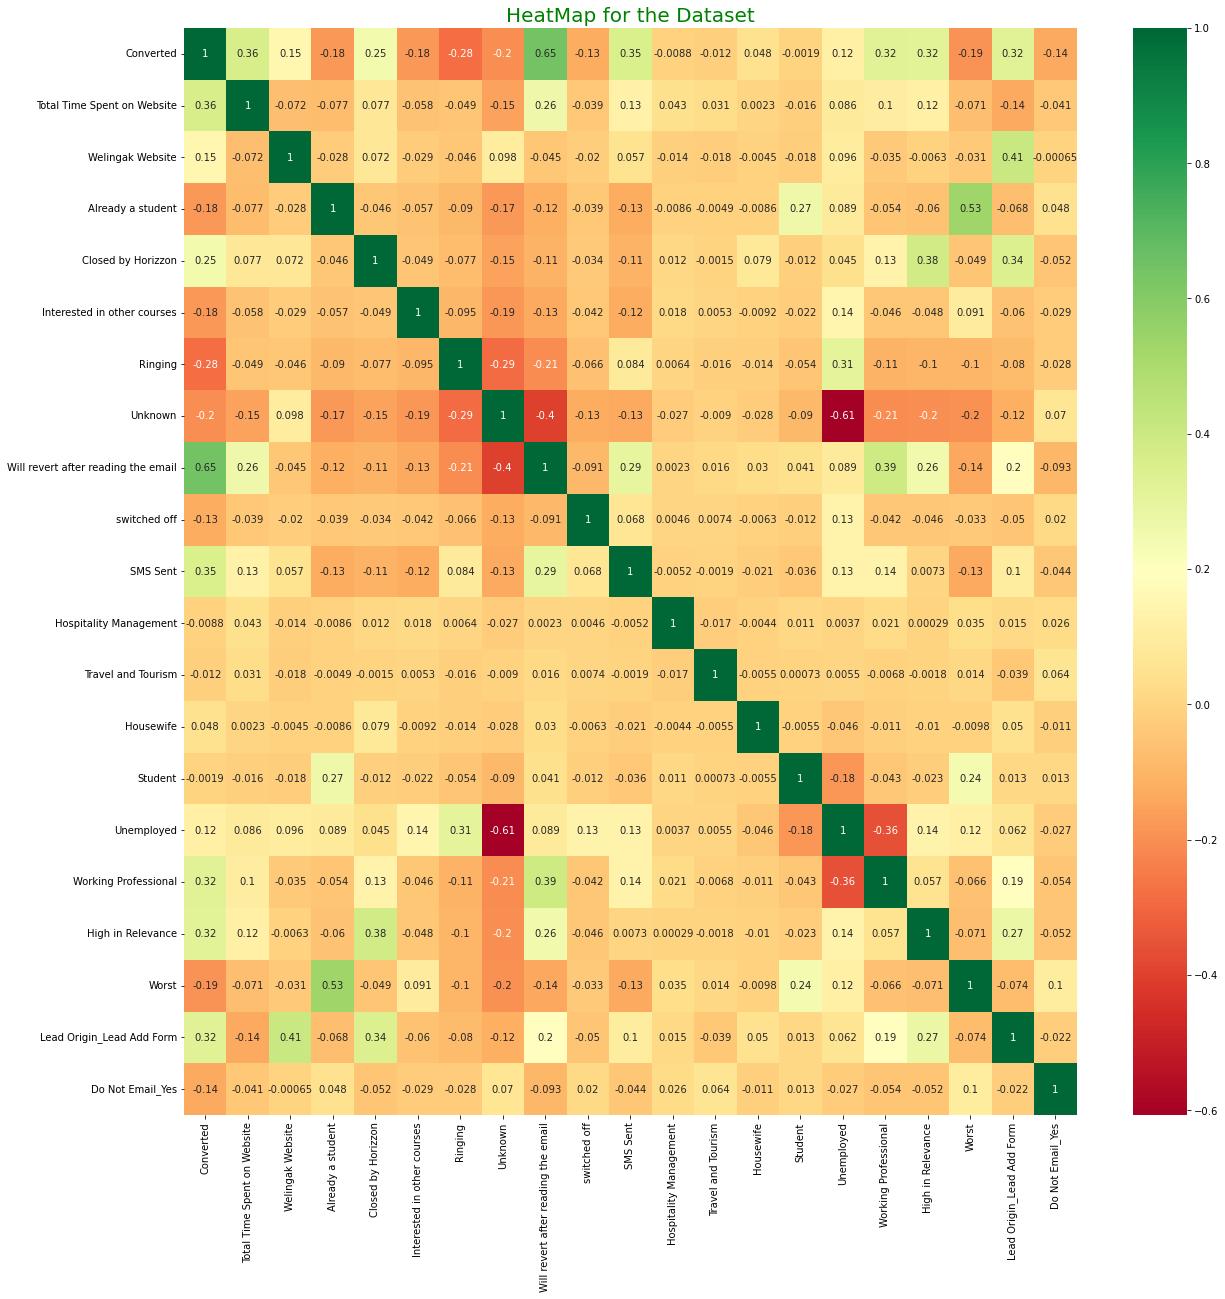

In [111]:
plt.figure(figsize = [20,20])
plt.title("HeatMap for the Dataset", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
sns.heatmap(pd.concat([y_train, X_train[col]], 1).corr(), cmap = 'RdYlGn', annot = True)
plt.show()

**Oservation**: 
Highly correlated variables with Target Variable (Converted) are 
- Will revert after reading the email
- Total Time Spent on Website
- SMS Sent
- Working Professional
- High In Relevance
- Lead Origin_Lead Add Form
etc.

Some low correlated variables with Target Variable (Converted) are 
- Hospitality Management
- Travel and Tourism
- Hiusewife
- Student
- Unemployed
etc.

# Step 8: Model Building

### Model #1

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1421.5
Date:                Tue, 24 Jan 2023   Deviance:                       2843.0
Time:                        19:42:28   Pearson chi2:                 7.72e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5893
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.0216      0.172    -17.531      0.000      -3.359      -2.684
Total Time Spent on Website             0.8903      0.050     17.953      0.000       0.793       0.988
Welingak Website                        2.8384      0.797      3.562      0.000       1.277       4.400
Already a student                      -3.2007      0.727     -4.401      0.000      -4.626      -1.775
Closed by Horizzon                      5.6343      1.022      5.513      0.000       3.631       7.637
Interested in other courses            -2.4628      0.343     -7.173      0.000      -3.136      -1.790
Ringing                                -3.7984      0.251    -15.156      0.000      -4.290      -3.307
Unknown                                 0.9610      0.154      6.237      0.000       0.659       1.263
Will revert after reading the email     3.5670      0.198     18.037      0.000       3.179       3.955
switched off                           -3.9029      0.535     -7.291      0.000      -4.952      -2.854
SMS Sent                                2.1509      0.122     17.592      0.000       1.911       2.390
Hospitality Management                 -0.9303      0.468     -1.986      0.047      -1.848      -0.012
Travel and Tourism                     -1.0946      0.385     -2.845      0.004      -1.849      -0.341
Housewife                              21.2087    1.5e+04      0.001      0.999   -2.93e+04    2.93e+04
Student                                 1.6449      0.474      3.474      0.001       0.717       2.573
Unemployed                              1.8702      0.137     13.625      0.000       1.601       2.139
Working Professional                    2.5793      0.331      7.800      0.000       1.931       3.227
High in Relevance                       1.1226      0.349      3.217      0.001       0.439       1.807
Worst                                  -1.8435      0.392     -4.701      0.000      -2.612      -1.075
Lead Origin_Lead Add Form               1.1461      0.312      3.678      0.000       0.535       1.757
Do Not Email_Yes                       -1.3371      0.215     -6.218      0.000      -1.759      -0.916
=======================================================================================================
"""

**Observation**: Housewife has very high P-value, hence this needs to be dropped

##### Prediction using this model

In [113]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:20]

1871    0.003211
6795    0.453807
3516    0.003814
8105    0.170304
3934    0.273161
4844    0.999027
3297    0.003686
8071    0.999275
987     0.179295
7423    0.998211
1032    0.968183
6542    0.807346
4317    0.862462
6472    0.801554
712     0.004102
3960    0.054743
4654    0.054743
5902    0.020532
4691    0.054743
4341    0.906985
dtype: float64

In [114]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:20]

array([0.00321067, 0.45380745, 0.00381352, 0.1703038 , 0.27316073,
       0.99902705, 0.00368574, 0.99927451, 0.17929488, 0.99821122,
       0.96818267, 0.80734625, 0.86246232, 0.80155419, 0.00410239,
       0.05474306, 0.05474306, 0.0205324 , 0.05474306, 0.90698504])

##### Dataframe with actual Converted and predicted Converted

In [115]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})

y_train_pred_final.head(50)

,Converted,Converted_Prob
0,0,0.003211
1,0,0.453807
2,0,0.003814
3,0,0.170304
4,0,0.273161
5,1,0.999027
6,0,0.003686
7,1,0.999275
8,0,0.179295
9,1,0.998211


##### Creating a new column 'predicted' with 1 if Converted > 0.5

In [116]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [117]:
y_train_pred_final.head(50)

,Converted,Converted_Prob,predicted
0,0,0.003211,0
1,0,0.453807,0
2,0,0.003814,0
3,0,0.170304,0
4,0,0.273161,0
5,1,0.999027,1
6,0,0.003686,0
7,1,0.999275,1
8,0,0.179295,0
9,1,0.998211,1


##### Confusion Matrix

In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3824  178]
 [ 365 2101]]


In [119]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9160482374768089


##### Checking VIF

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Unemployed,4.16
7,Will revert after reading the email,3.05
5,Ringing,1.88
15,Working Professional,1.84
18,Lead Origin_Lead Add Form,1.79
3,Closed by Horizzon,1.69
2,Already a student,1.68
17,Worst,1.67
9,SMS Sent,1.58
16,High in Relevance,1.48


##### Dropping column "Housewife" due to high P value

In [121]:
col = col.drop('Housewife', 1)
col

Index(['Total Time Spent on Website', 'Welingak Website', 'Already a student',
       'Closed by Horizzon', 'Interested in other courses', 'Ringing',
       'Unknown', 'Will revert after reading the email', 'switched off',
       'SMS Sent', 'Hospitality Management', 'Travel and Tourism', 'Student',
       'Unemployed', 'Working Professional', 'High in Relevance', 'Worst',
       'Lead Origin_Lead Add Form', 'Do Not Email_Yes'],
      dtype='object')

### Model #2

In [122]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1423.5
Date:                Tue, 24 Jan 2023   Deviance:                       2847.0
Time:                        19:42:29   Pearson chi2:                 7.80e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5890
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.9919      0.171    -17.499      0.000      -3.327      -2.657
Total Time Spent on Website             0.8890      0.050     17.950      0.000       0.792       0.986
Welingak Website                        2.8102      0.796      3.529      0.000       1.249       4.371
Already a student                      -3.1985      0.727     -4.398      0.000      -4.624      -1.773
Closed by Horizzon                      5.7613      1.021      5.641      0.000       3.760       7.763
Interested in other courses            -2.4600      0.343     -7.170      0.000      -3.132      -1.788
Ringing                                -3.7980      0.251    -15.160      0.000      -4.289      -3.307
Unknown                                 0.9409      0.153      6.134      0.000       0.640       1.242
Will revert after reading the email     3.6045      0.198     18.188      0.000       3.216       3.993
switched off                           -3.9008      0.535     -7.288      0.000      -4.950      -2.852
SMS Sent                                2.1481      0.122     17.575      0.000       1.909       2.388
Hospitality Management                 -0.9396      0.469     -2.001      0.045      -1.860      -0.019
Travel and Tourism                     -1.1065      0.386     -2.866      0.004      -1.863      -0.350
Student                                 1.5989      0.476      3.357      0.001       0.665       2.532
Unemployed                              1.8416      0.136     13.559      0.000       1.575       2.108
Working Professional                    2.5273      0.330      7.651      0.000       1.880       3.175
High in Relevance                       1.0940      0.350      3.124      0.002       0.408       1.780
Worst                                  -1.8445      0.393     -4.699      0.000      -2.614      -1.075
Lead Origin_Lead Add Form               1.1907      0.309      3.848      0.000       0.584       1.797
Do Not Email_Yes                       -1.3397      0.216     -6.216      0.000      -1.762      -0.917
=======================================================================================================
"""

**Observation**: Hospitality Management has very highest P-value and there are sufficient number of variables available, hence this column can be dropped as well

##### Prediction using this model

In [123]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:20]

array([0.00321914, 0.44910614, 0.00382264, 0.16988978, 0.26963091,
       0.9990368 , 0.00369474, 0.9993572 , 0.18059633, 0.99826985,
       0.96744222, 0.80406859, 0.86707362, 0.81183767, 0.00411177,
       0.05530023, 0.05530023, 0.02068753, 0.05530023, 0.91020739])

In [124]:
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(50)

,Converted,Converted_Prob,predicted
0,0,0.003219,0
1,0,0.449106,0
2,0,0.003823,0
3,0,0.169890,0
4,0,0.269631,0
5,1,0.999037,1
6,0,0.003695,0
7,1,0.999357,1
8,0,0.180596,0
9,1,0.998270,1


##### Metrics accuracy

In [125]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.91573902288188


##### Looking at the vif again

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Unemployed,4.13
7,Will revert after reading the email,3.01
5,Ringing,1.87
14,Working Professional,1.83
17,Lead Origin_Lead Add Form,1.79
2,Already a student,1.67
3,Closed by Horizzon,1.67
16,Worst,1.67
9,SMS Sent,1.58
15,High in Relevance,1.48


##### Dropping column "Hospitality Management	" due to high P value

In [127]:
col = col.drop('Hospitality Management', 1)
col

Index(['Total Time Spent on Website', 'Welingak Website', 'Already a student',
       'Closed by Horizzon', 'Interested in other courses', 'Ringing',
       'Unknown', 'Will revert after reading the email', 'switched off',
       'SMS Sent', 'Travel and Tourism', 'Student', 'Unemployed',
       'Working Professional', 'High in Relevance', 'Worst',
       'Lead Origin_Lead Add Form', 'Do Not Email_Yes'],
      dtype='object')

### Model #3

In [128]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1425.6
Date:                Tue, 24 Jan 2023   Deviance:                       2851.2
Time:                        19:42:30   Pearson chi2:                 7.78e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5887
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.9991      0.171    -17.547      0.000      -3.334      -2.664
Total Time Spent on Website             0.8814      0.049     17.866      0.000       0.785       0.978
Welingak Website                        2.8176      0.796      3.539      0.000       1.257       4.378
Already a student                      -3.1892      0.727     -4.387      0.000      -4.614      -1.764
Closed by Horizzon                      5.7433      1.021      5.625      0.000       3.742       7.744
Interested in other courses            -2.4936      0.346     -7.215      0.000      -3.171      -1.816
Ringing                                -3.8053      0.250    -15.197      0.000      -4.296      -3.315
Unknown                                 0.9394      0.153      6.127      0.000       0.639       1.240
Will revert after reading the email     3.5895      0.197     18.185      0.000       3.203       3.976
switched off                           -3.8979      0.535     -7.287      0.000      -4.946      -2.850
SMS Sent                                2.1468      0.122     17.579      0.000       1.907       2.386
Travel and Tourism                     -1.0910      0.385     -2.831      0.005      -1.846      -0.336
Student                                 1.5982      0.478      3.342      0.001       0.661       2.535
Unemployed                              1.8440      0.136     13.576      0.000       1.578       2.110
Working Professional                    2.5157      0.330      7.629      0.000       1.869       3.162
High in Relevance                       1.1059      0.350      3.159      0.002       0.420       1.792
Worst                                  -1.8479      0.392     -4.719      0.000      -2.615      -1.080
Lead Origin_Lead Add Form               1.1863      0.309      3.837      0.000       0.580       1.792
Do Not Email_Yes                       -1.3539      0.216     -6.265      0.000      -1.777      -0.930
=======================================================================================================
"""

**Observation**: All the variables P-value are on lower side. Need to review the VIF to decide wehter to drop any column

##### Prediction using this model

In [129]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:20]

array([0.00320191, 0.44752757, 0.0037966 , 0.16654785, 0.26971083,
       0.99898809, 0.00367063, 0.99933932, 0.17862544, 0.99820613,
       0.96680176, 0.80356727, 0.86535025, 0.80728506, 0.00408121,
       0.05519504, 0.05519504, 0.02030657, 0.05519504, 0.90867155])

In [130]:
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(50)

,Converted,Converted_Prob,predicted
0,0,0.003202,0
1,0,0.447528,0
2,0,0.003797,0
3,0,0.166548,0
4,0,0.269711,0
5,1,0.998988,1
6,0,0.003671,0
7,1,0.999339,1
8,0,0.178625,0
9,1,0.998206,1


##### Metrics Accuracy

In [131]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9160482374768089


##### Looking at the vif again

In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Unemployed,4.13
7,Will revert after reading the email,3.01
5,Ringing,1.87
13,Working Professional,1.83
16,Lead Origin_Lead Add Form,1.78
2,Already a student,1.67
3,Closed by Horizzon,1.67
15,Worst,1.67
9,SMS Sent,1.58
14,High in Relevance,1.48


##### Dropping column "Unemployed" due to high VIF value

In [133]:
col = col.drop('Unemployed', 1)
col

Index(['Total Time Spent on Website', 'Welingak Website', 'Already a student',
       'Closed by Horizzon', 'Interested in other courses', 'Ringing',
       'Unknown', 'Will revert after reading the email', 'switched off',
       'SMS Sent', 'Travel and Tourism', 'Student', 'Working Professional',
       'High in Relevance', 'Worst', 'Lead Origin_Lead Add Form',
       'Do Not Email_Yes'],
      dtype='object')

### Model #4

In [134]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1520.9
Date:                Tue, 24 Jan 2023   Deviance:                       3041.8
Time:                        19:42:32   Pearson chi2:                 8.06e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5764
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3298      0.112    -11.911      0.000      -1.549      -1.111
Total Time Spent on Website             0.8711      0.047     18.500      0.000       0.779       0.963
Welingak Website                        3.7846      0.796      4.754      0.000       2.224       5.345
Already a student                      -3.0582      0.727     -4.206      0.000      -4.483      -1.633
Closed by Horizzon                      5.6604      1.020      5.550      0.000       3.662       7.659
Interested in other courses            -2.4398      0.346     -7.050      0.000      -3.118      -1.762
Ringing                                -3.7938      0.251    -15.112      0.000      -4.286      -3.302
Unknown                                -0.2802      0.123     -2.279      0.023      -0.521      -0.039
Will revert after reading the email     3.6105      0.196     18.457      0.000       3.227       3.994
switched off                           -3.8803      0.535     -7.249      0.000      -4.929      -2.831
SMS Sent                                2.3330      0.118     19.727      0.000       2.101       2.565
Travel and Tourism                     -1.1462      0.371     -3.086      0.002      -1.874      -0.418
Student                                 0.1273      0.521      0.244      0.807      -0.894       1.149
Working Professional                    0.9039      0.312      2.893      0.004       0.292       1.516
High in Relevance                       1.1465      0.352      3.254      0.001       0.456       1.837
Worst                                  -1.7622      0.393     -4.487      0.000      -2.532      -0.993
Lead Origin_Lead Add Form               1.4649      0.317      4.616      0.000       0.843       2.087
Do Not Email_Yes                       -1.2441      0.210     -5.930      0.000      -1.655      -0.833
=======================================================================================================
"""

**Observation**: Column 'Student' is having high P-value, hence needs to be dropped

##### Prediction using this model

In [135]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:20]

array([0.00274604, 0.16727552, 0.00324982, 0.1677749 , 0.08461334,
       0.99920808, 0.00314318, 0.99950884, 0.25307383, 0.99822747,
       0.8953323 , 0.55149579, 0.84728636, 0.95741989, 0.00349062,
       0.08461334, 0.08461334, 0.0351825 , 0.08461334, 0.89523828])

In [136]:
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(50)

,Converted,Converted_Prob,predicted
0,0,0.002746,0
1,0,0.167276,0
2,0,0.003250,0
3,0,0.167775,0
4,0,0.084613,0
5,1,0.999208,1
6,0,0.003143,0
7,1,0.999509,1
8,0,0.253074,0
9,1,0.998227,1


##### Metrics Accuracy

In [137]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9012059369202227


##### Looking at the vif again

In [138]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Will revert after reading the email,1.99
15,Lead Origin_Lead Add Form,1.78
14,Worst,1.56
2,Already a student,1.52
9,SMS Sent,1.52
3,Closed by Horizzon,1.49
13,High in Relevance,1.47
12,Working Professional,1.38
1,Welingak Website,1.29
0,Total Time Spent on Website,1.19


##### Dropping column "Student" due to highest P value

In [139]:
col = col.drop('Student', 1)
col

Index(['Total Time Spent on Website', 'Welingak Website', 'Already a student',
       'Closed by Horizzon', 'Interested in other courses', 'Ringing',
       'Unknown', 'Will revert after reading the email', 'switched off',
       'SMS Sent', 'Travel and Tourism', 'Working Professional',
       'High in Relevance', 'Worst', 'Lead Origin_Lead Add Form',
       'Do Not Email_Yes'],
      dtype='object')

### Model #5

In [140]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1520.9
Date:                Tue, 24 Jan 2023   Deviance:                       3041.8
Time:                        19:42:33   Pearson chi2:                 8.06e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5764
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3285      0.112    -11.914      0.000      -1.547      -1.110
Total Time Spent on Website             0.8711      0.047     18.500      0.000       0.779       0.963
Welingak Website                        3.7811      0.796      4.751      0.000       2.221       5.341
Already a student                      -3.0517      0.727     -4.200      0.000      -4.476      -1.628
Closed by Horizzon                      5.6601      1.020      5.550      0.000       3.661       7.659
Interested in other courses            -2.4389      0.346     -7.049      0.000      -3.117      -1.761
Ringing                                -3.7950      0.251    -15.120      0.000      -4.287      -3.303
Unknown                                -0.2813      0.123     -2.288      0.022      -0.522      -0.040
Will revert after reading the email     3.6153      0.195     18.567      0.000       3.234       3.997
switched off                           -3.8802      0.535     -7.248      0.000      -4.929      -2.831
SMS Sent                                2.3327      0.118     19.726      0.000       2.101       2.564
Travel and Tourism                     -1.1443      0.371     -3.084      0.002      -1.872      -0.417
Working Professional                    0.8999      0.312      2.883      0.004       0.288       1.512
High in Relevance                       1.1441      0.352      3.248      0.001       0.454       1.834
Worst                                  -1.7602      0.393     -4.482      0.000      -2.530      -0.991
Lead Origin_Lead Add Form               1.4679      0.317      4.634      0.000       0.847       2.089
Do Not Email_Yes                       -1.2428      0.210     -5.923      0.000      -1.654      -0.832
=======================================================================================================
"""

**Observation**: Although the column 'Unknown' P-value is within the acceptable limits, this column can still be dropped as in coorelation matrix this column had low correlation with Converted and there are still sufficient number of factors

##### Predictions using this model

In [141]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:20]

array([0.00274615, 0.16731481, 0.00324999, 0.16775748, 0.08463123,
       0.99920963, 0.00314334, 0.9995076 , 0.25313365, 0.99823796,
       0.89533994, 0.55148437, 0.8480723 , 0.95767109, 0.00349082,
       0.08463123, 0.08463123, 0.03523679, 0.08463123, 0.89581044])

In [142]:
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(50)

,Converted,Converted_Prob,predicted
0,0,0.002746,0
1,0,0.167315,0
2,0,0.003250,0
3,0,0.167757,0
4,0,0.084631,0
5,1,0.999210,1
6,0,0.003143,0
7,1,0.999508,1
8,0,0.253134,0
9,1,0.998238,1


##### Accuracy Score

In [143]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9013605442176871


##### Looking at the vif again

In [144]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Will revert after reading the email,1.97
14,Lead Origin_Lead Add Form,1.78
13,Worst,1.53
9,SMS Sent,1.52
3,Closed by Horizzon,1.49
2,Already a student,1.47
12,High in Relevance,1.47
11,Working Professional,1.38
1,Welingak Website,1.29
0,Total Time Spent on Website,1.19


##### Dropping the column 'Unknown'

In [145]:
col = col.drop('Unknown', 1)
col

Index(['Total Time Spent on Website', 'Welingak Website', 'Already a student',
       'Closed by Horizzon', 'Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'switched off', 'SMS Sent',
       'Travel and Tourism', 'Working Professional', 'High in Relevance',
       'Worst', 'Lead Origin_Lead Add Form', 'Do Not Email_Yes'],
      dtype='object')

### Model #6

In [146]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1523.5
Date:                Tue, 24 Jan 2023   Deviance:                       3047.0
Time:                        19:42:34   Pearson chi2:                 8.13e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5761
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.5458      0.060    -25.574      0.000      -1.664      -1.427
Total Time Spent on Website             0.8795      0.047     18.740      0.000       0.788       0.971
Welingak Website                        3.7065      0.795      4.660      0.000       2.148       5.265
Already a student                      -2.8837      0.724     -3.985      0.000      -4.302      -1.465
Closed by Horizzon                      5.8373      1.017      5.741      0.000       3.844       7.830
Interested in other courses            -2.2446      0.336     -6.677      0.000      -2.904      -1.586
Ringing                                -3.5894      0.234    -15.310      0.000      -4.049      -3.130
Will revert after reading the email     3.8131      0.175     21.831      0.000       3.471       4.155
switched off                           -3.6695      0.527     -6.957      0.000      -4.703      -2.636
SMS Sent                                2.3358      0.118     19.731      0.000       2.104       2.568
Travel and Tourism                     -1.1465      0.372     -3.080      0.002      -1.876      -0.417
Working Professional                    0.9556      0.313      3.050      0.002       0.342       1.570
High in Relevance                       1.2535      0.354      3.542      0.000       0.560       1.947
Worst                                  -1.5744      0.386     -4.081      0.000      -2.331      -0.818
Lead Origin_Lead Add Form               1.4985      0.317      4.722      0.000       0.877       2.120
Do Not Email_Yes                       -1.2431      0.210     -5.930      0.000      -1.654      -0.832
=======================================================================================================
"""

**Observation**: The P-value of all the columns are within acceptable range. If the VIFs are also within acceptable range (less than 2), the model can be considered as Final model

##### Predictions using this model

In [147]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:20]

array([0.0026945 , 0.1764263 , 0.00319406, 0.16816652, 0.08911772,
       0.99925184, 0.00308825, 0.99957768, 0.26640973, 0.99823827,
       0.90267178, 0.56680085, 0.84483221, 0.95720327, 0.00343312,
       0.08911772, 0.08911772, 0.03730797, 0.08911772, 0.89385508])

In [148]:
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(50)

,Converted,Converted_Prob,predicted
0,0,0.002695,0
1,0,0.176426,0
2,0,0.003194,0
3,0,0.168167,0
4,0,0.089118,0
5,1,0.999252,1
6,0,0.003088,0
7,1,0.999578,1
8,0,0.266410,0
9,1,0.998238,1


##### Accuracy Score

In [149]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9078540507111935


##### Looking at the VIF again

In [150]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Will revert after reading the email,1.95
13,Lead Origin_Lead Add Form,1.78
12,Worst,1.53
3,Closed by Horizzon,1.49
2,Already a student,1.47
11,High in Relevance,1.47
8,SMS Sent,1.44
10,Working Professional,1.38
1,Welingak Website,1.27
0,Total Time Spent on Website,1.17


**Observation**: As the VIF values and P-vlaues for all the variables are within acceptable range, this model can be considered as final model

##### Re-evaluating Confusion matrix

In [151]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3782  220]
 [ 376 2090]]


##### Metrics beyond simply accuracy

In [152]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false positive
FN = confusion[1,0] # false negative

In [153]:
# sensitivity = TP / (TP+FN)
TP / (TP+FN)

0.8475263584752636

In [154]:
# specificity = TN / (TN+FP)
TN / (TN+FP)

0.9450274862568716

In [155]:
# false positive rate
FP / (FP+TN)

0.054972513743128434

In [156]:
# positive predictive value
TP / (TP+FP)

0.9047619047619048

In [157]:
# Negative predictive value
TN / (TN+FN)

0.9095719095719096

# Step 9: Plotting ROC Curve

##### Defining a function to plot ROC Curve

In [158]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Poitive Rate')
    plt.title('Receiver operating characteristic example',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    plt.legend(loc = 'lower right')
    plt.show()
    
    print(fpr, fpr.shape)
    print(tpr, tpr.shape)
    print(thresholds, thresholds.shape)
    print(auc_score)

In [159]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

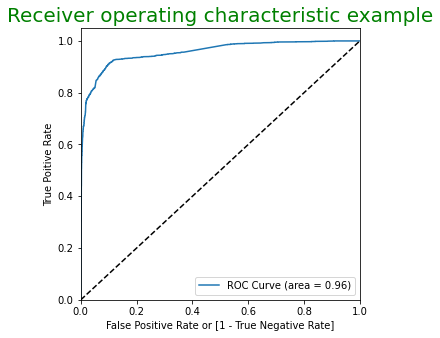

[0.         0.         0.         ... 0.99950025 0.99975012 1.        ] (4111,)
[0.00000000e+00 4.05515004e-04 8.11030008e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00] (4111,)
[1.99998803e+00 9.99988027e-01 9.99984463e-01 ... 2.93656097e-04
 1.75257952e-04 1.19499563e-04] (4111,)
0.9575315748451807


In [160]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob) #ROC Curve for Train Dataset

# Step 10: Finding the Optimal Cutoff Point


##### Find a balanced sensitivity and specificity

In [161]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002695,0,1,0,0,0,0,0,0,0,0,0
1,0,0.176426,0,1,1,0,0,0,0,0,0,0,0
2,0,0.003194,0,1,0,0,0,0,0,0,0,0,0
3,0,0.168167,0,1,1,0,0,0,0,0,0,0,0
4,0,0.089118,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,1,0.985807,1,1,1,1,1,1,1,1,1,1,1
6464,1,0.993802,1,1,1,1,1,1,1,1,1,1,1
6465,1,0.089118,0,1,0,0,0,0,0,0,0,0,0
6466,0,0.043609,0,1,0,0,0,0,0,0,0,0,0


In [162]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

##### Calculate accuracy, senstivity and specificity for various probability cutoffs

In [163]:
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negative
# FP = confusion[0,1] # false positive
# FN = confusion[1,0] # false negative

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.783550  0.950527  0.680660
0.2   0.2  0.899041  0.926196  0.882309
0.3   0.3  0.905535  0.901865  0.907796
0.4   0.4  0.906926  0.872263  0.928286
0.5   0.5  0.907854  0.847526  0.945027
0.6   0.6  0.901361  0.792782  0.968266
0.7   0.7  0.899969  0.771290  0.979260
0.8   0.8  0.895331  0.753852  0.982509
0.9   0.9  0.867965  0.669100  0.990505


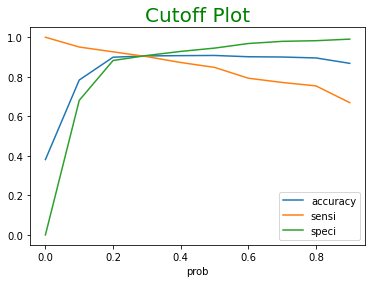

In [164]:
# Plotting accuracy sensitivity and specificity for various probabilities
cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensi', 'speci'])
plt.title('Cutoff Plot',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

 **Observation**: approximately 0.3 looks like an optimum point to take it as a cutoff probability

##### Considering 0.3 as optimum cutoff value

In [165]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.002695,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.176426,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.003194,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.168167,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.089118,0,1,0,0,0,0,0,0,0,0,0,0


In [166]:
# Revised Confusion matrix based on new optimum cutoff point
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion1)

[[3633  369]
 [ 242 2224]]


In [167]:
TP1 = confusion1[1,1] # true positive
TN1 = confusion1[0,0] # true negative
FP1 = confusion1[0,1] # false positive
FN1 = confusion1[1,0] # false negative

In [168]:
# sensitivity = TP / (TP+FN)
TP1 / (TP1+FN1)

0.9018653690186537

In [169]:
# specificity = TN / (TN+FP)
TN1 / (TN1+FP1)

0.9077961019490255

In [170]:
# false positive rate
FP1 / (FP1+TN1)

0.09220389805097451

In [171]:
# positive predictive value
TP1 / (TP1+FP1)

0.8576937909757039

In [172]:
# Negative predictive value
TN1 / (TN1+FN1)

0.9375483870967742

In [173]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.905534941249227


In [174]:
(2791+999)/(2791+999+288+844)

0.7700121901665989

#### Recall and Precision for Train set

In [175]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9047619047619048

In [176]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8475263584752636

 #### Precision and recall tradeoff

In [177]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [178]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

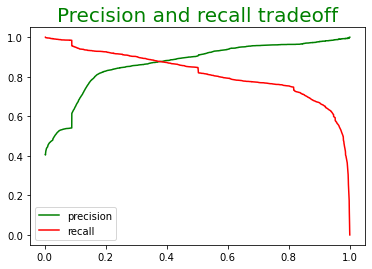

In [179]:
plt.title('Precision and recall tradeoff',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.plot(thresholds, p[:-1], 'g-', label = 'precision')
plt.plot(thresholds, r[:-1], 'r-', label = 'recall')
plt.legend()
plt.show()

# Step 11: Making predictions of test set

In [180]:
num_cols #numerical columns

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [181]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]) # scaling the test dataset

In [182]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Will revert after reading the email,switched off,SMS Sent,Travel and Tourism,Working Professional,High in Relevance,Worst,Lead Origin_Lead Add Form,Do Not Email_Yes
4269,0.964504,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2376,-0.885371,0,0,0,0,0,1,0,1,0,0,0,0,1,0
7766,-0.777416,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9199,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4359,-0.885371,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [183]:
X_test_sm = sm.add_constant(X_test)

##### Making predictions on the test set

In [184]:
y_test_pred = res.predict(X_test_sm)

In [185]:
y_test_pred[:10]

4269    0.837301
2376    0.995145
7766    0.926845
9199    0.005442
4359    0.951992
9186    0.997678
1631    0.957662
8963    0.872130
8007    0.145434
5324    0.995205
dtype: float64

In [186]:
y_pred_1 = pd.DataFrame(y_test_pred) #Converting the y_pred to a dataframe which is currently an array

In [187]:
y_pred_1.head()

,0
4269,0.837301
2376,0.995145
7766,0.926845
9199,0.005442
4359,0.951992


In [188]:
y_test_df = pd.DataFrame(y_test) # to convert y_test to dataframe from array

In [189]:
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)

In [190]:
y_pred_final.head()

,Converted,0
4269,1,0.837301
2376,1,0.995145
7766,1,0.926845
9199,0,0.005442
4359,1,0.951992


In [191]:
y_pred_final = y_pred_final.rename(columns = {0 : 'Converted_Prob'}) # renaming column name from 0 to Converted_Prob

In [192]:
y_pred_final = y_pred_final.reindex(['Converted','Converted_Prob'], axis = 1)

In [193]:
y_pred_final.head()

,Converted,Converted_Prob
4269,1,0.837301
2376,1,0.995145
7766,1,0.926845
9199,0,0.005442
4359,1,0.951992


In [194]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0) # the cutoff was 0.3

In [195]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
4269,1,0.837301,1
2376,1,0.995145,1
7766,1,0.926845,1
9199,0,0.005442,0
4359,1,0.951992,1


In [196]:
# Model Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.908008658008658

In [197]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1515,  162],
       [  93, 1002]], dtype=int64)

In [198]:
TP2 = confusion2[1,1] # true positive
TN2 = confusion2[0,0] # true negative
FP2 = confusion2[0,1] # false positive
FN2 = confusion2[1,0] # false negative

In [199]:
# sensitivity = TP / (TP+FN)
print('Sensitivity of Test Dataset', round(TP2 / (TP2+FN2),2)) #senstitivity for test dataset
print('Sensitivity of Train Dataset', round(TP1 / (TP1+FN1),2)) #senstitivity for train dataset

Sensitivity of Test Dataset 0.92
Sensitivity of Train Dataset 0.9


In [200]:
# specificity = TN / (TN+FP)
print('Specificity of Test Dataset', round(TN2 / (TN2+FP2),2)) #specificity for test dataset
print('Specificity of Train Dataset', round(TN1 / (TN1+FP1),2)) #specificity for train dataset

Specificity of Test Dataset 0.9
Specificity of Train Dataset 0.91


In [201]:
# false positive rate
print('False Positive Rate of Test Dataset', round(FP2 / (FP2+TN2),2)) #false positive rate for test dataset
print('False Positive Rate of Train Dataset', round(FP1 / (FP1+TN1),2)) #false positive rate for train dataset

False Positive Rate of Test Dataset 0.1
False Positive Rate of Train Dataset 0.09


In [202]:
# positive predictive value
print('Positive Predictive Value of Test Dataset', round(TP2 / (TP2+FP2),2)) #positive predictive value for test dataset
print('Positive Predictive Value of Train Dataset', round(TP1 / (TP1+FP1),2)) #positive predictive value for train dataset

Positive Predictive Value of Test Dataset 0.86
Positive Predictive Value of Train Dataset 0.86


In [203]:
# Negative predictive value
print('Negative Predictive Value of Test Dataset', round(TN2 / (TN2+FN2),2)) # Negative Predictive Value for test dataset
print('Negative Predictive Value of train Dataset', round(TN1 / (TN1+FN1),2)) # Negative Predictive Value for train dataset

Negative Predictive Value of Test Dataset 0.94
Negative Predictive Value of train Dataset 0.94


In [204]:
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)) #accuracy score of predicted y value in test dataset

0.908008658008658


##### ROC curve for test dataset

In [205]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

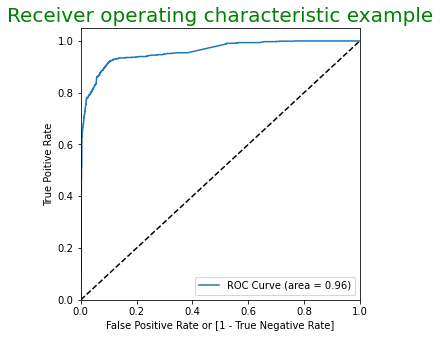

[0.         0.         0.         ... 0.99880739 0.9994037  1.        ] (1963,)
[0.00000000e+00 9.13242009e-04 1.82648402e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00] (1963,)
[1.99996851e+00 9.99968509e-01 9.99965791e-01 ... 3.75365059e-04
 3.59989144e-04 3.26866522e-04] (1963,)
0.9595262795326509


In [206]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob) # ROC Curve for Test dataset

#### Recall and Precision for Test dataset

In [207]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted) #precision score

0.8608247422680413

In [208]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted) #recall score

0.915068493150685

**Observation**:
- Train dataset: precision score is 90.48% and recall score is 84.75%
- Test dataset: precision score is 86.08% and recall score is 91.51%
- The test prediction seems to recall better than train model prediction due to imbalance in the dataset

# Step 12: Lead Score Calculation

As Final Step, lead score needs to be calculated. To do so, the predicted y values needs to be multiplied by 100

##### Lead Score calculation for Train DataSet

In [209]:
lead_score_train = res.predict(X_train_sm)*100 #new series with predicted y value multiplied by 100 gives Lead Score out of 100

In [210]:
lead_score_train

1871     0.269450
6795    17.642630
3516     0.319406
8105    16.816652
3934     8.911772
          ...    
350     98.580702
79      99.380205
8039     8.911772
6936     4.360893
5640     8.911772
Length: 6468, dtype: float64

In [211]:
X_train_sm

,const,Total Time Spent on Website,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Will revert after reading the email,switched off,SMS Sent,Travel and Tourism,Working Professional,High in Relevance,Worst,Lead Origin_Lead Add Form,Do Not Email_Yes
1871,1.0,-0.885371,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6795,1.0,0.005716,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3516,1.0,-0.691418,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8105,1.0,1.365219,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3934,1.0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1.0,-0.885371,0,0,0,0,0,1,0,0,0,0,1,0,1,0
79,1.0,0.404601,0,0,0,0,0,1,0,0,0,1,0,0,1,0
8039,1.0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6936,1.0,-0.449891,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [212]:
lead_train = pd.concat([X_train_sm, lead_score_train], 1) #lead_train dataset by concatinating the lead_scroe_train and X_train

In [213]:
lead_train

,const,Total Time Spent on Website,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Will revert after reading the email,switched off,SMS Sent,Travel and Tourism,Working Professional,High in Relevance,Worst,Lead Origin_Lead Add Form,Do Not Email_Yes,0
1871,1.0,-0.885371,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.269450
6795,1.0,0.005716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.642630
3516,1.0,-0.691418,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.319406
8105,1.0,1.365219,0,0,0,0,1,0,0,1,0,0,0,0,0,0,16.816652
3934,1.0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.911772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1.0,-0.885371,0,0,0,0,0,1,0,0,0,0,1,0,1,0,98.580702
79,1.0,0.404601,0,0,0,0,0,1,0,0,0,1,0,0,1,0,99.380205
8039,1.0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.911772
6936,1.0,-0.449891,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.360893


In [214]:
lead_train = lead_train.rename(columns = {0:'Lead Score'}) # renaming the first column to Lead Score

In [215]:
lead_train

,const,Total Time Spent on Website,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Will revert after reading the email,switched off,SMS Sent,Travel and Tourism,Working Professional,High in Relevance,Worst,Lead Origin_Lead Add Form,Do Not Email_Yes,Lead Score
1871,1.0,-0.885371,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.269450
6795,1.0,0.005716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.642630
3516,1.0,-0.691418,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.319406
8105,1.0,1.365219,0,0,0,0,1,0,0,1,0,0,0,0,0,0,16.816652
3934,1.0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.911772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1.0,-0.885371,0,0,0,0,0,1,0,0,0,0,1,0,1,0,98.580702
79,1.0,0.404601,0,0,0,0,0,1,0,0,0,1,0,0,1,0,99.380205
8039,1.0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.911772
6936,1.0,-0.449891,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.360893


##### Lead Score Calculation for Test Dataset

In [216]:
lead_score_test = res.predict(X_test_sm)*100 #new series with predicted y value multiplied by 100 gives Lead Score out of 100

In [217]:
lead_test = pd.concat([X_test_sm, lead_score_test], 1) #lead_train dataset by concatinating the lead_scroe_train and X_train

In [218]:
lead_test = lead_test.rename(columns = {0:'Lead Score'}) # renaming the first column to Lead Score

In [219]:
lead_test

,const,Total Time Spent on Website,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Will revert after reading the email,switched off,SMS Sent,Travel and Tourism,Working Professional,High in Relevance,Worst,Lead Origin_Lead Add Form,Do Not Email_Yes,Lead Score
4269,1.0,0.964504,0,0,0,0,0,0,0,1,0,0,0,0,0,0,83.730128
2376,1.0,-0.885371,0,0,0,0,0,1,0,1,0,0,0,0,1,0,99.514544
7766,1.0,-0.777416,0,0,0,0,0,1,0,0,0,1,0,0,0,0,92.684503
9199,1.0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.544217
4359,1.0,-0.885371,0,0,0,0,0,1,0,0,0,0,0,0,1,0,95.199176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,-0.354744,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.496290
2152,1.0,-0.885371,0,0,0,0,0,0,0,1,0,0,0,0,1,0,81.904152
7101,1.0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.986224
5331,1.0,2.056864,0,0,0,0,0,0,0,0,1,0,0,0,0,1,10.656451


In [220]:
lead = pd.concat([lead_test, lead_train], 0).reset_index() #dataset with test and train dataset combined and forming a complete dataset

In [221]:
lead.drop('index', 1, inplace = True) #dropping the index column generated after reset index

In [222]:
lead.head(50)

,const,Total Time Spent on Website,Welingak Website,Already a student,Closed by Horizzon,Interested in other courses,Ringing,Will revert after reading the email,switched off,SMS Sent,Travel and Tourism,Working Professional,High in Relevance,Worst,Lead Origin_Lead Add Form,Do Not Email_Yes,Lead Score
0,1.0,0.964504,0,0,0,0,0,0,0,1,0,0,0,0,0,0,83.730128
1,1.0,-0.885371,0,0,0,0,0,1,0,1,0,0,0,0,1,0,99.514544
2,1.0,-0.777416,0,0,0,0,0,1,0,0,0,1,0,0,0,0,92.684503
3,1.0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.544217
4,1.0,-0.885371,0,0,0,0,0,1,0,0,0,0,0,0,1,0,95.199176
5,1.0,0.234435,0,0,0,0,0,1,0,1,0,0,1,0,0,0,99.767759
6,1.0,0.968164,0,0,0,0,0,1,0,0,0,0,0,0,0,0,95.766237
7,1.0,-0.394998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,87.213021
8,1.0,-0.255938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.543382
9,1.0,-0.592611,0,0,0,0,0,1,0,1,0,0,1,0,0,0,99.520532


**Conclusion**
- As the final model is derived, it can be observed that the probability of conversion will highly be influenced by the leads closed by Horizzon
- Welingak website seems to be a source for hot leads for as it has a strong positive impact on the model
- Students or potential customers who chose to revert after reading the email were more likely to be converted as leads
- Leads whose phones were generally switched off or ringing were less likely to be converted as leads
- It was also anticipated that potential leads who are already student or interested in other courses had lesser chance of becoming strong leads
- In general, the Tags column in general seems to be an important column as most of the variables from the model are converted to dummy variable with high coefficient magnitudes